## Data Science and Big Data 95-885 CMU Spring 2019
### Carol Xiang and Daniel Lesser

### Import Statements

In [53]:
#Data and plotting
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin

#from sklearn.impute import IterativeImputer #I can't get this to load for some reason...

#Machine Learning Algorithms
#svm, random forest, naive bayes, knn etc...

### Loading in Data

In [2]:
dataIn = pd.read_csv('./Dataset/diabetic_data.csv')

In [3]:
dataIn.shape

(101766, 50)

In [4]:
dataIn.head(5).T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [5]:
dataIn.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
id_cols = ['encounter_id', 'patient_nbr']
cat_cols = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id',
           'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
           'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
           'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
           'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
           'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
cont_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
diag_cols = ['diag_1', 'diag_2', 'diag_3']
diag_cols_new = ['diag_1_abbrv', 'diag_2_abbrv', 'diag_3_abbrv']

In [7]:
for feature in dataIn.columns:
    if feature not in id_cols:
        print(feature, ": ", Counter(dataIn[feature]))
        print()

race :  Counter({'Caucasian': 76099, 'AfricanAmerican': 19210, '?': 2273, 'Hispanic': 2037, 'Other': 1506, 'Asian': 641})

gender :  Counter({'Female': 54708, 'Male': 47055, 'Unknown/Invalid': 3})

age :  Counter({'[70-80)': 26068, '[60-70)': 22483, '[50-60)': 17256, '[80-90)': 17197, '[40-50)': 9685, '[30-40)': 3775, '[90-100)': 2793, '[20-30)': 1657, '[10-20)': 691, '[0-10)': 161})

weight :  Counter({'?': 98569, '[75-100)': 1336, '[50-75)': 897, '[100-125)': 625, '[125-150)': 145, '[25-50)': 97, '[0-25)': 48, '[150-175)': 35, '[175-200)': 11, '>200': 3})

admission_type_id :  Counter({1: 53990, 3: 18869, 2: 18480, 6: 5291, 5: 4785, 8: 320, 7: 21, 4: 10})

discharge_disposition_id :  Counter({1: 60234, 3: 13954, 6: 12902, 18: 3691, 2: 2128, 22: 1993, 11: 1642, 5: 1184, 25: 989, 4: 815, 7: 623, 23: 412, 13: 399, 14: 372, 28: 139, 8: 108, 15: 63, 24: 48, 9: 21, 17: 14, 16: 11, 19: 8, 10: 6, 27: 5, 12: 3, 20: 2})

admission_source_id :  Counter({7: 57494, 1: 29565, 17: 6781, 4: 3187, 6:

repaglinide :  Counter({'No': 100227, 'Steady': 1384, 'Up': 110, 'Down': 45})

nateglinide :  Counter({'No': 101063, 'Steady': 668, 'Up': 24, 'Down': 11})

chlorpropamide :  Counter({'No': 101680, 'Steady': 79, 'Up': 6, 'Down': 1})

glimepiride :  Counter({'No': 96575, 'Steady': 4670, 'Up': 327, 'Down': 194})

acetohexamide :  Counter({'No': 101765, 'Steady': 1})

glipizide :  Counter({'No': 89080, 'Steady': 11356, 'Up': 770, 'Down': 560})

glyburide :  Counter({'No': 91116, 'Steady': 9274, 'Up': 812, 'Down': 564})

tolbutamide :  Counter({'No': 101743, 'Steady': 23})

pioglitazone :  Counter({'No': 94438, 'Steady': 6976, 'Up': 234, 'Down': 118})

rosiglitazone :  Counter({'No': 95401, 'Steady': 6100, 'Up': 178, 'Down': 87})

acarbose :  Counter({'No': 101458, 'Steady': 295, 'Up': 10, 'Down': 3})

miglitol :  Counter({'No': 101728, 'Steady': 31, 'Down': 5, 'Up': 2})

troglitazone :  Counter({'No': 101763, 'Steady': 3})

tolazamide :  Counter({'No': 101727, 'Steady': 38, 'Up': 1})

exam

##### Features changes to make:

a. Consider omitting these columns due to high proportion of missing values:

    weight, payer_code, medical_specialty, 

1. Drop rows with unknown/invalid gender
2. Fill in missing values '?' for the following columns:

    race, weight, payer_code, medical_specialty, diag_1, diag_2, diag_3,readmitted
    
    
3. Turn the following columns into categorical columns via OHE

    admission_type_id, discharge_disposition_id, admission_source_id, payer_code, medical_specialty
    
    
4. Turn the following columns into ordinal features

    Test results: max_glu_serum, A1Cresult
    
    All medications from metformin through metformin-pioglitazone
    
    
4. Turn the following columns into binary columns (1,0)

    change, diabetesMed, readmitted
    
    
5. Group together diag_1,diag_2 and diag_3 into one column with combined counts.
6. Group together diag_123 into smaller subgroups using ICD9 codings
7. Turn diag_123 into dummy features via OHE

### Data Cleaning

In [8]:
#Drop unknown/invalid gender columns
origRows = dataIn.shape[0]
dataIn = dataIn[dataIn.gender != 'Unknown/Invalid']
print(origRows-dataIn.shape[0], " rows dropped")

3  rows dropped


In [9]:
#Drop Weight column due to high proportion of '?'
dataIn.drop('weight',axis=1, inplace=True)
dataIn.drop('payer_code', axis=1, inplace=True)
dataIn.drop('medical_specialty', axis=1, inplace=True)

#### Data Imputation

In [10]:
for diag in diag_cols:
    print(diag+"_abbrv")

diag_1_abbrv
diag_2_abbrv
diag_3_abbrv


In [11]:
#Reduce each diag code to first 3 letters.
for diag in diag_cols:
    diagNew = diag+"_abbrv"
    dataIn[diagNew] = dataIn[diag].str[:3]

In [12]:
#Replace '?' with NaN
dataIn.replace('?', np.NaN, inplace=True)

In [13]:
dataIn.isna().sum()

encounter_id                   0
patient_nbr                    0
race                        2271
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [14]:
#Drop n.a rows for race
origRows = dataIn.shape[0]
dataIn = dataIn[dataIn.gender != 'Unknown/Invalid']
dataIn.dropna(subset=['race'], inplace=True)
print(origRows-dataIn.shape[0], " rows dropped")

2271  rows dropped


In [15]:
dataIn.isna().sum()

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        19
diag_2                       336
diag_3                      1349
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [16]:
for feature in dataIn.columns:
    if feature not in id_cols:
        print(feature, ": ", Counter(dataIn[feature]))
        print()

race :  Counter({'Caucasian': 76099, 'AfricanAmerican': 19210, 'Hispanic': 2037, 'Other': 1505, 'Asian': 641})

gender :  Counter({'Female': 53575, 'Male': 45917})

age :  Counter({'[70-80)': 25468, '[60-70)': 21988, '[50-60)': 16895, '[80-90)': 16800, '[40-50)': 9465, '[30-40)': 3699, '[90-100)': 2724, '[20-30)': 1611, '[10-20)': 682, '[0-10)': 160})

admission_type_id :  Counter({1: 52900, 3: 18507, 2: 17786, 6: 5225, 5: 4727, 8: 317, 7: 20, 4: 10})

discharge_disposition_id :  Counter({1: 58767, 3: 13614, 6: 12698, 18: 3673, 2: 2061, 22: 1981, 11: 1608, 5: 1143, 25: 973, 4: 765, 7: 611, 23: 406, 13: 397, 14: 369, 28: 138, 8: 107, 15: 63, 24: 48, 9: 21, 17: 14, 16: 11, 19: 8, 10: 6, 27: 5, 12: 3, 20: 2})

admission_source_id :  Counter({7: 56632, 1: 28854, 17: 6698, 4: 2986, 6: 1989, 2: 1042, 5: 848, 3: 187, 20: 160, 9: 54, 8: 16, 22: 12, 10: 7, 14: 2, 11: 2, 25: 2, 13: 1})

time_in_hospital :  Counter({3: 17342, 2: 16841, 1: 13877, 4: 13605, 5: 9763, 6: 7366, 7: 5720, 8: 4297, 9: 29

repaglinide :  Counter({'No': 97963, 'Steady': 1375, 'Up': 109, 'Down': 45})

nateglinide :  Counter({'No': 98796, 'Steady': 662, 'Up': 23, 'Down': 11})

chlorpropamide :  Counter({'No': 99407, 'Steady': 78, 'Up': 6, 'Down': 1})

glimepiride :  Counter({'No': 94458, 'Steady': 4527, 'Up': 321, 'Down': 186})

acetohexamide :  Counter({'No': 99491, 'Steady': 1})

glipizide :  Counter({'No': 87093, 'Steady': 11101, 'Up': 754, 'Down': 544})

glyburide :  Counter({'No': 89113, 'Steady': 9039, 'Up': 794, 'Down': 546})

tolbutamide :  Counter({'No': 99470, 'Steady': 22})

pioglitazone :  Counter({'No': 92316, 'Steady': 6829, 'Up': 230, 'Down': 117})

rosiglitazone :  Counter({'No': 93265, 'Steady': 5968, 'Up': 175, 'Down': 84})

acarbose :  Counter({'No': 99190, 'Steady': 289, 'Up': 10, 'Down': 3})

miglitol :  Counter({'No': 99454, 'Steady': 31, 'Down': 5, 'Up': 2})

troglitazone :  Counter({'No': 99489, 'Steady': 3})

tolazamide :  Counter({'No': 99453, 'Steady': 38, 'Up': 1})

examide :  Co

#### Transforming Categorical Columns

In [17]:
# One-hot-encoding the following columns 
# ??????? look into 2 options, too many medical sepcialties ????????
ohe_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'race']

for col_name in ohe_cols:
    # n/a not encoded, include all the encoded columns
    dataIn = pd.concat([dataIn, pd.get_dummies(dataIn[col_name], drop_first=True,prefix=col_name)],axis=1)
    #dataIn.drop([col_name],axis=1, inplace=True) # keep the original colums for now

In [18]:
# Turn the following columns (test results, medications and age) into ordinal features
ord_cols = ['max_glu_serum', 'A1Cresult',
           'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
           'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
           'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
           'metformin-rosiglitazone', 'metformin-pioglitazone',
           'age']        

def change_ord_cols(value):
    '''
    Takes a feature and converts it into an ordinal column.  Based on value domain available in the
    original dataset.  If additional features and/or values are added, this method needs to be adjusted
    to account for that.
    '''
    if value == 'None' or value == 'No':
        return '0'
    elif value == 'Norm' or value == 'Down':
        return '1'
    elif value in ['>200', '>7', 'Steady']:
        return '2'
    elif value in ['>300', '>8', 'Up']:
        return '3'

ord_cols_new = []

for col_name in ord_cols[:-1]:
    new_col_name = col_name + "_ord"
    ord_cols_new.append(new_col_name)
    dataIn[new_col_name] = dataIn[col_name].map(lambda x: int(change_ord_cols(x)))

dataIn['age_ord'] = dataIn['age'].map(lambda x: x[1:2])

In [19]:
# Turn the following columns into binary features
# Had change, prescribed biabetes med, readmitted<30  ==>  1
# No change, did not prescribed diabetes med, not readmitted or readmitted>30  ==>  0
# Male ==>  1

bin_cols = ['change', 'diabetesMed', 'readmitted', 'gender']

def change_bin_cols(value):
    '''
    Creates dummy binary features based on input columns.
    '''
    if value in ['No', 'NO', '>30', 'Female']:
        return '0'
    elif value in ['Ch', 'Yes', '<30', 'Male']:
        return '1'  

for col_name in bin_cols:
    new_col_name = col_name + "_bin"
    dataIn[new_col_name] = dataIn[col_name].map(lambda x: int(change_bin_cols(x)))

dataIn.rename(columns={'gender_bin':'is_male'}, inplace=True)

#### Combining Diagnoses

In [20]:
#Note: need to handle a few categories differently

#For infectious conditions
infec_list = ['00{}'.format(i) for i in range(1, 10)]
temp = ['0{}'.format(i) for i in range(10, 100)]
infec_list+=temp
temp = ['{}'.format(i) for i in range(100, 140)]
infec_list+=temp

In [21]:
#for supplementary conditions
suppl_list = ['V0{}'.format(i) for i in range(1, 10)]
temp = ['V{}'.format(i) for i in range(10, 92)]
suppl_list+= temp

In [22]:
#for external conditions
external_list = ['E00{}'.format(i) for i in range(0, 10)]
temp = ['E0{}'.format(i) for i in range(10, 31)]
external_list+= temp
temp = ['E{}'.format(i) for i in range(800, 1000)]
external_list+= temp

In [70]:
external_list

['E000',
 'E001',
 'E002',
 'E003',
 'E004',
 'E005',
 'E006',
 'E007',
 'E008',
 'E009',
 'E010',
 'E011',
 'E012',
 'E013',
 'E014',
 'E015',
 'E016',
 'E017',
 'E018',
 'E019',
 'E020',
 'E021',
 'E022',
 'E023',
 'E024',
 'E025',
 'E026',
 'E027',
 'E028',
 'E029',
 'E030',
 'E800',
 'E801',
 'E802',
 'E803',
 'E804',
 'E805',
 'E806',
 'E807',
 'E808',
 'E809',
 'E810',
 'E811',
 'E812',
 'E813',
 'E814',
 'E815',
 'E816',
 'E817',
 'E818',
 'E819',
 'E820',
 'E821',
 'E822',
 'E823',
 'E824',
 'E825',
 'E826',
 'E827',
 'E828',
 'E829',
 'E830',
 'E831',
 'E832',
 'E833',
 'E834',
 'E835',
 'E836',
 'E837',
 'E838',
 'E839',
 'E840',
 'E841',
 'E842',
 'E843',
 'E844',
 'E845',
 'E846',
 'E847',
 'E848',
 'E849',
 'E850',
 'E851',
 'E852',
 'E853',
 'E854',
 'E855',
 'E856',
 'E857',
 'E858',
 'E859',
 'E860',
 'E861',
 'E862',
 'E863',
 'E864',
 'E865',
 'E866',
 'E867',
 'E868',
 'E869',
 'E870',
 'E871',
 'E872',
 'E873',
 'E874',
 'E875',
 'E876',
 'E877',
 'E878',
 'E879',
 

In [23]:
#Codes from http://www.icd9data.com/2015/Volume1/default.htm
diag_codes = {'Infect_Paras_d' : np.arange(1,140), 'Neoplasm_d' : np.arange(140,240),
             'Endo_Nutri_Immun_d' : np.arange(240,280), 'Blood_d' : np.arange(280,290),
             'Mental_d' : np.arange(290,320), 'Nervous_d' : np.arange(320, 390), 
             'Circulatory_d' : np.arange(390, 460), 'Respiratory_d' : np.arange(460, 520),
             'Digestive_d' : np.arange(520, 580), 'Genitourinary' : np.arange(580, 630), 
             'Pregnancy_d' : np.arange(630, 680), 'Skin_d' : np.arange(680,710), 
             'Muscu_Connective_d' : np.arange(710, 740), 'Congentinal_d' : np.arange(740, 760), 
             'Perinatal_d' : np.arange(760, 780), 'Ill_Defined_d' : np.arange(780, 800), 
             'Injury_d' : np.arange(800, 1000), 'Supplementary_d' : suppl_list, 
             'External_d' : external_list}

In [71]:
dataIn[dataIn['diag_3'].isin(external_list)].T #for some reason external_d isn't getting encoded??

,159,440,479,692,696,763,832,1051,1271,1652,...,101133,101165,101186,101242,101260,101431,101515,101570,101703,101707
encounter_id,2476920,3936522,4171512,5293998,5319174,5914314,6504906,7870338,8946336,11091954,...,435488558,436055138,436129910,436735964,437231636,439082486,440251070,441338738,443191964,443197808
patient_nbr,4279149,78770403,435366,1697436,87847776,64052667,1734102,1149777,458415,567828,...,97086861,43900875,31492026,86534235,41137614,141453482,182326865,124235987,125535857,141379232
race,Caucasian,Caucasian,Caucasian,Caucasian,Other,Caucasian,AfricanAmerican,Caucasian,Caucasian,AfricanAmerican,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Male,Female,Female,Male,Female,Male,Female,Female,Female,...,Female,Female,Male,Female,Female,Male,Female,Male,Male,Male
age,[80-90),[60-70),[50-60),[70-80),[70-80),[70-80),[50-60),[40-50),[80-90),[60-70),...,[70-80),[40-50),[80-90),[80-90),[70-80),[70-80),[70-80),[70-80),[10-20),[50-60)
admission_type_id,6,1,6,6,6,6,6,1,1,1,...,2,1,1,1,1,1,1,1,1,1
discharge_disposition_id,25,1,25,25,6,1,25,7,5,5,...,6,2,6,3,1,3,1,1,1,3
admission_source_id,1,7,1,7,7,7,7,1,7,1,...,7,7,7,7,7,7,7,7,7,7
time_in_hospital,5,2,5,2,11,3,11,1,4,7,...,2,2,7,5,3,5,2,2,3,5
num_lab_procedures,54,55,12,84,71,40,36,49,66,55,...,64,57,76,55,20,75,10,17,44,39


In [24]:
#convert to strings for easy comparison to diag_1, diag_2, diag_3
for key, value in diag_codes.items():
    diag_codes[key] = [str(i) for i in value]

In [25]:
#create blank columns
for c in diag_codes:
    dataIn[c] = 0

In [26]:
def diagonsis_col_creation(row, diag_code, diag_col):
    '''
    Loops through the values in the diagnoses codes and returns 1 if the diagnosis provided
    matches that grouping, otherwise returns zero. For use with DataFrame.apply().  Row = row in dataframe.
    diag_cols = one of the three diag_1, _2, _3 columns in dataframe.  diag_code = grouped codings.
    '''
    
    #check first if its already = 1
    if row[diag_code] == np.NaN:
        return 0
    elif row[diag_code] == 1:
        return 1
    else:
        if row[diag_col] in diag_codes[diag_code]:
            return 1
        else:
            return 0

In [27]:
#do coding for dummy disease columns
for diag_code in diag_codes: #loop through to create all the columns
    for diag_col in diag_cols_new: #go through each of the three diagonses
        dataIn[diag_code] = dataIn.apply(lambda row: diagonsis_col_creation(row, diag_code,diag_col),axis=1)

In [28]:
dataIn.sample(5).T

,42092,43811,72408,84892,75367
encounter_id,129981360,135186930,211860360,268305450,225768324
patient_nbr,41603049,23234022,87407325,110071008,45027189
race,Caucasian,AfricanAmerican,Caucasian,Asian,Caucasian
gender,Female,Female,Male,Male,Male
age,[70-80),[70-80),[60-70),[50-60),[50-60)
admission_type_id,3,2,1,1,1
discharge_disposition_id,1,1,6,1,1
admission_source_id,1,1,7,7,7
time_in_hospital,1,4,7,5,2
num_lab_procedures,4,44,83,49,47


### Boolean Type 1 vs. Type 2 diabetes as top 3 diagnosis

In [29]:
diab_types = {'Type1_d' : ['250.01', '250.03', '250.11', '250.13', '250.21', '250.23','250.31', '250.33',
        '250.41', '250.43','250.51', '250.53','250.61', '250.63','250.71', '250.73',
        '250.81', '250.83','250.91', '250.93'], 
             'Type2_d' : ['250.00', '250.02', '250.10', '250.12', '250.20', '250.22','250.30', '250.32',
        '250.40', '250.42','250.50', '250.52','250.60', '250.62','250.70', '250.72',
        '250.80', '250.82','250.90', '250.92'],
             'TypeGeneric_d' : ['250','250.1', '250.2', '250.3', '250.4', '250.5', '250.6', 
                                '250.7', '250.8', '250.9']}

In [30]:
dataIn['Type1_d'] = 0
dataIn['Type2_d'] = 0
dataIn['TypeGeneric_d'] = 0

In [31]:
def diabetesType(row, diag_type, diag_col):
    '''
    Loops through the values in the diagnoses codes and returns a 1 or 0 depending on whether
    the patient has that type of diabetes or not
    '''
    #print(diag_type)
    #print(diag_col)
    #print(row[diag_col])
    
    #check if already matched first
    if row[diag_type] == 1:
        return 1
    elif row[diag_col] in diab_types[diag_type]:
        return 1
    else:
        return 0

In [32]:
#do coding for dummy disease columns
for diag_col in diag_cols: #loop through to create all the columns
    for diab_type in diab_types: #go through each of the three diagonses
        dataIn[diab_type] = dataIn.apply(lambda row: diabetesType(row, diab_type,diag_col),axis=1)

In [33]:
dataIn.sample(5).T

,63665,64140,73914,77598,90869
encounter_id,177131634,178506066,219460470,235891092,301911326
patient_nbr,35457480,74638566,105890688,66143772,57440115
race,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian
gender,Male,Male,Female,Female,Male
age,[60-70),[40-50),[70-80),[80-90),[40-50)
admission_type_id,5,2,3,1,1
discharge_disposition_id,2,1,1,3,1
admission_source_id,1,1,1,7,7
time_in_hospital,4,7,5,4,9
num_lab_procedures,38,48,29,56,67


### Data Visualization

In [117]:
diags = {}
for diag in diag_codes:
    diags[diag] = sum(dataIn[diag])
diags = pd.DataFrame(diags, index=[0])

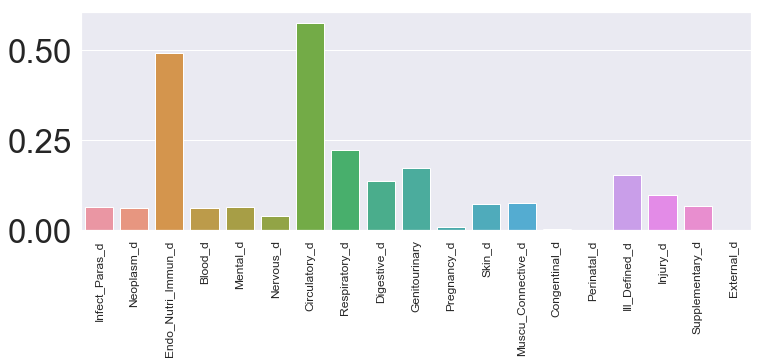

In [132]:
fig = plt.figure(figsize=(12,4))
ax = sns.barplot(data=diags/len(dataIn))
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [135]:
med_cols = ['max_glu_serum_ord','A1Cresult_ord','metformin_ord','repaglinide_ord','nateglinide_ord'
,'chlorpropamide_ord','glimepiride_ord','acetohexamide_ord','glipizide_ord','glyburide_ord'
,'tolbutamide_ord','pioglitazone_ord','rosiglitazone_ord','acarbose_ord','miglitol_ord'
,'troglitazone_ord','tolazamide_ord','examide_ord','citoglipton_ord','insulin_ord','glyburide-metformin_ord'
,'glipizide-metformin_ord','glimepiride-pioglitazone_ord','metformin-rosiglitazone_ord','metformin-pioglitazone_ord']

In [143]:
meds = {} #consider doing as a stacked area chart (count of down/steady/up)
for med in med_cols:
    meds[med] = sum(dataIn[med])
meds = pd.DataFrame(meds, index=[0])

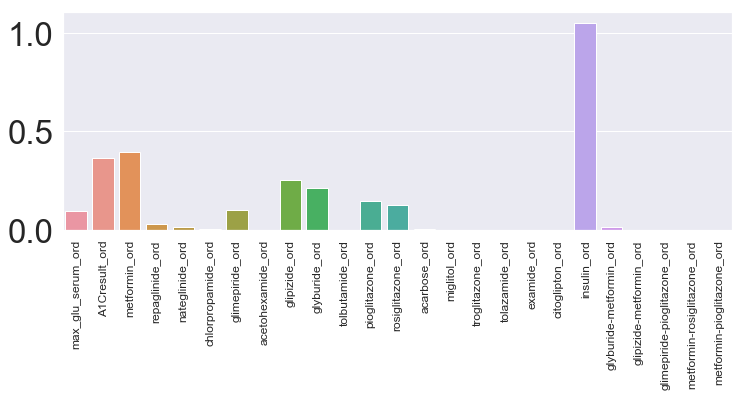

In [144]:
fig = plt.figure(figsize=(12,4))
ax = sns.barplot(data=meds/len(dataIn))
plt.xticks(rotation=90, fontsize=12)
plt.show()

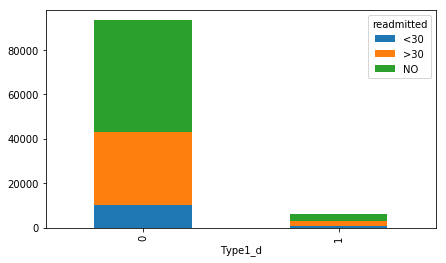

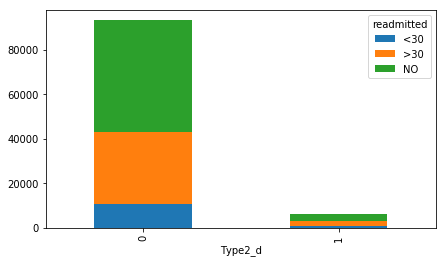

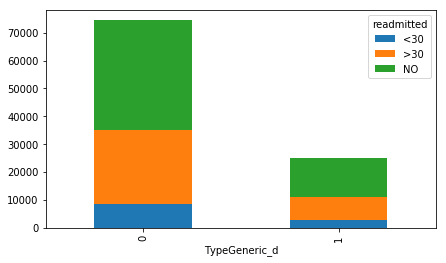

In [34]:
#Diabetes Types
for col in diab_types:
    pivot_tab = dataIn.pivot_table(index=col, columns='readmitted', values='encounter_id', aggfunc='count')
    pivot_tab.plot.bar(stacked=True, figsize=(7,4))

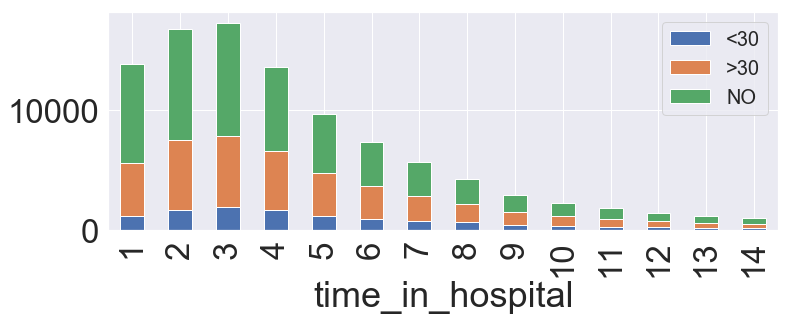

In [97]:
#time in hospital

pivot_tab = dataIn.pivot_table(index='time_in_hospital', columns='readmitted', values='encounter_id', aggfunc='count')
pivot_tab.plot.bar(stacked=True, figsize=(12,4)).legend(loc=1, prop={'size':20})

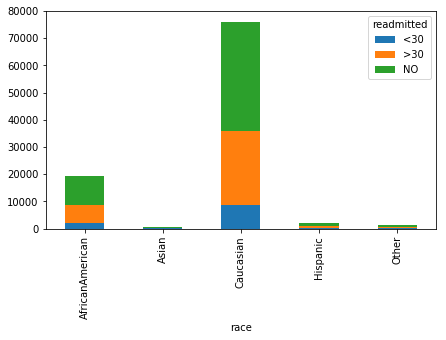

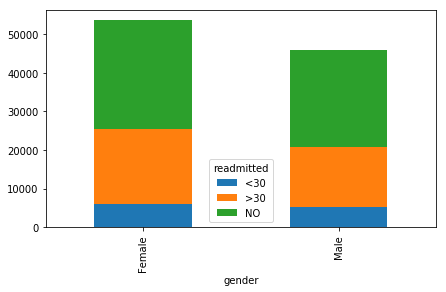

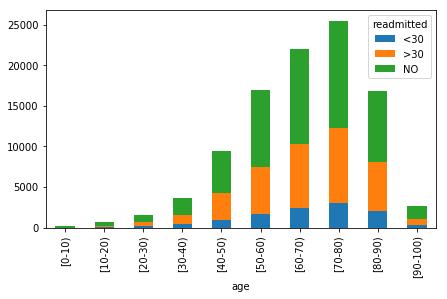

In [35]:
demographics = ['race','gender','age']

def visual_demographics():
    '''
    Plot stacked bar charts to visualize readmission rate of groups with different demographic features
    '''
    for col in demographics:
        pivot_tab = dataIn.pivot_table(index=col, columns='readmitted', values='encounter_id', aggfunc='count')
        pivot_tab.plot.bar(stacked=True, figsize=(7,4))

visual_demographics()

#### Deleting Outliers

In [36]:
dataIn[cont_cols].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000
mean,4.398454,43.072971,1.340540,16.026545,0.373357,0.201343,0.643107,7.439251
std,2.986972,19.695587,1.703686,8.119809,1.276805,0.939981,1.271370,1.926043
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [37]:
# %%time
## Hat matrix calculations to identify outliers
# saved_data = dataIn
# n_rows = len(dataIn)

# dataIn_cont = dataIn[cont_cols]

# hat_m = dataIn_cont(np.linalg.inv(dataIn_cont.T.dot(dataIn)).dot(dataIn_cont.T))
# hat_v = np.sum(hat_m **2,0)

# plt.scatter(range(len(hat_v)), hat_v, s=1000*hat_v, alpha=0.6)

# # find observations whose hat values exceed 2 times the average
# vindex = np.where(hat_v > 2*np.mean(hat_v))
# print(vindex[0])

# dataIn.drop(vindex[0], inplace = True)

# print("Removed " + str(n_rows - len(dataIn)) + " rows")

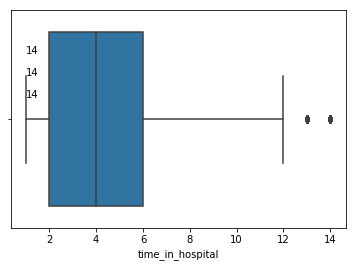

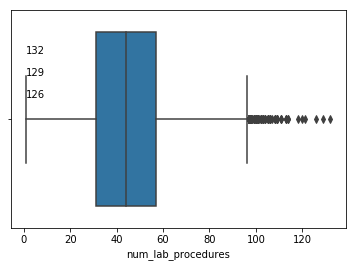

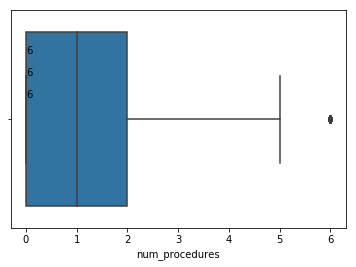

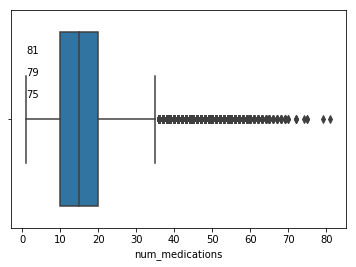

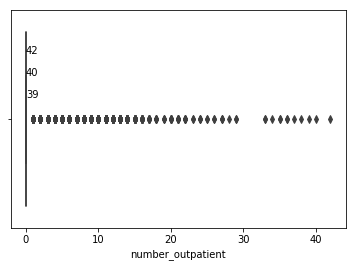

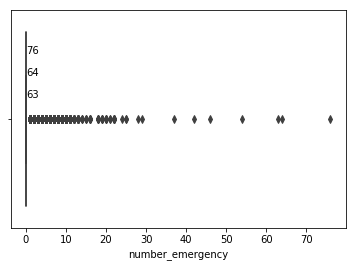

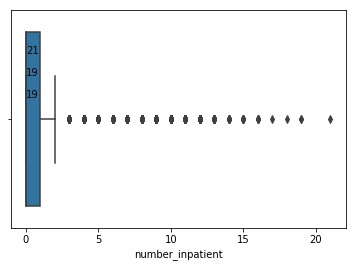

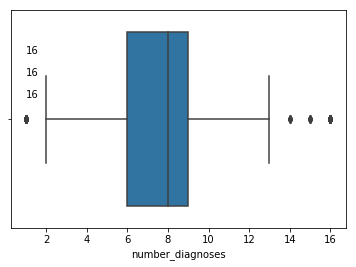

In [38]:
def visual_continious_cols():
    '''
    This function visualizes Box-and-whisker plots for continuous variables
    '''
    for i in cont_cols:
        sns.boxplot(dataIn[i])

        # Print the three highest values
        highest_vals = sorted(dataIn[i].tolist(),reverse=True)[:3]
        smallest_val = min(dataIn[i])
        
        plt.text(smallest_val, -0.3, highest_vals[0])
        plt.text(smallest_val, -0.2, highest_vals[1])
        plt.text(smallest_val, -0.1, highest_vals[2])

        plt.show()
        
visual_continious_cols()

In [39]:
saved_data = dataIn
n_rows = len(dataIn)
# Method 1
# Delete observations with one of the following features higher than 99th percentile 
# Continuous features with outliers of extremely large values
# cols = ['num_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency','number_inpatient']

# for col in cols:
#     P = np.percentile(saved_data[col], 99)
#     dataIn = dataIn[(dataIn[col] < P)]

# Method 2
# Delete observations with one of the following features valued more than 3*IQR above 75th percentile
# Continuous features with non-zero median
cols = set(cont_cols) - set(['number_outpatient', 'number_emergency', 'number_inpatient'])

for col in cols:
    cutoff = 3*np.subtract(*np.percentile(saved_data[col], [75, 25])) + np.percentile(saved_data[col], 75)
    dataIn = dataIn[(dataIn[col]) < cutoff]
    
print("Removed " + str(n_rows - len(dataIn)) + " rows")

Removed 471 rows


#### Dealing with skewness in continuous variables

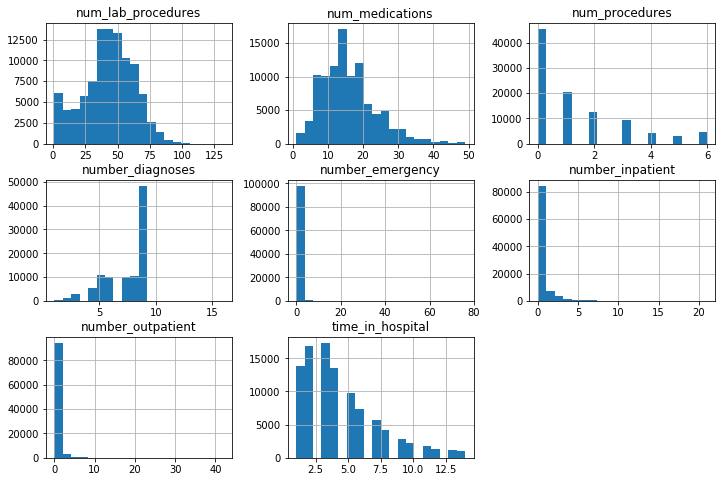

In [40]:
dataIn[cont_cols].hist(bins=20,figsize=(12,8));

In [41]:
cont_cols_boxcox = []
for col in cont_cols:
    col_new = col + '_boxcox'
    cont_cols_boxcox.append(col_new)
    # add 1 to variables with value 0 (cannot box-cox tranform non-positive values)
    if dataIn[col].min() == 0:
        dataIn[col_new], _ = stats.boxcox(dataIn[col]+1)
    else:
        dataIn[col_new], _ = stats.boxcox(dataIn[col])

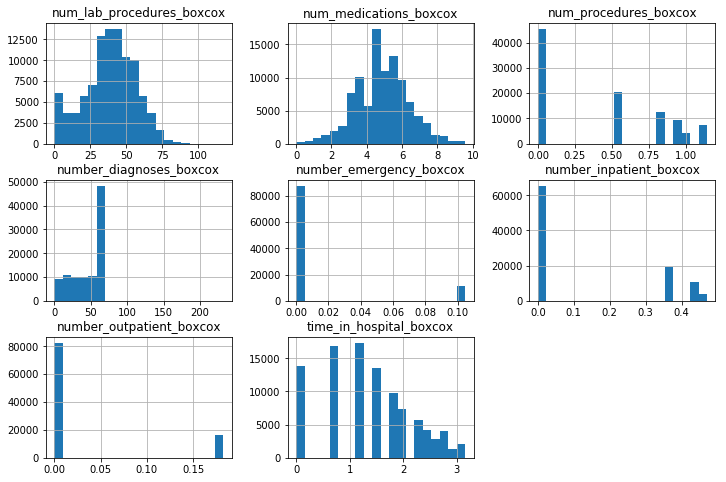

In [42]:
dataIn[cont_cols_boxcox].hist(bins=20,figsize=(12,8));

### Reviewing co-correlations

In [43]:
for c in dataIn.columns:
    print(c)

encounter_id
patient_nbr
race
gender
age
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted
diag_1_abbrv
diag_2_abbrv
diag_3_abbrv
admission_type_id_1
admission_type_id_2
admission_type_id_3
admission_type_id_4
admission_type_id_5
admission_type_id_6
admission_type_id_7
admission_type_id_8
discharge_disposition_id_1
discharge_disposition_id_2
discharge_disposition_id_3
discharge_disposition_id_4
discharge_disposition_id_5
discharge_disposition_id_6
discharg

In [98]:
input_features = ['Type1_d','Type2_d','TypeGeneric_d','time_in_hospital_boxcox','num_lab_procedures_boxcox'
,'num_procedures_boxcox','num_medications_boxcox','number_outpatient_boxcox','number_emergency_boxcox'
,'number_inpatient_boxcox','number_diagnoses_boxcox','is_male','Infect_Paras_d','Neoplasm_d'
,'Endo_Nutri_Immun_d','Blood_d','Mental_d','Nervous_d','Circulatory_d','Respiratory_d','Digestive_d'
,'Genitourinary','Pregnancy_d','Skin_d','Muscu_Connective_d','Congentinal_d','Perinatal_d','Ill_Defined_d'
,'Injury_d','Supplementary_d','External_d','race_Asian','race_Caucasian'
,'race_Hispanic','race_Other','max_glu_serum_ord','A1Cresult_ord','metformin_ord','repaglinide_ord'
,'nateglinide_ord','chlorpropamide_ord','glimepiride_ord','acetohexamide_ord','glipizide_ord'
,'glyburide_ord','tolbutamide_ord','pioglitazone_ord','rosiglitazone_ord','acarbose_ord','miglitol_ord'
,'troglitazone_ord','tolazamide_ord','examide_ord','citoglipton_ord','insulin_ord','glyburide-metformin_ord'
,'glipizide-metformin_ord','glimepiride-pioglitazone_ord','metformin-rosiglitazone_ord'
,'metformin-pioglitazone_ord','age_ord','change_bin','diabetesMed_bin'
,'admission_type_id_2','admission_type_id_3','admission_type_id_4','admission_type_id_5'
,'admission_type_id_6','admission_type_id_7','admission_type_id_8'
,'discharge_disposition_id_2','discharge_disposition_id_3'
,'discharge_disposition_id_4','discharge_disposition_id_5'
,'discharge_disposition_id_6','discharge_disposition_id_7'
,'discharge_disposition_id_8','discharge_disposition_id_9'
,'discharge_disposition_id_10','discharge_disposition_id_11'
,'discharge_disposition_id_12','discharge_disposition_id_13'
,'discharge_disposition_id_14','discharge_disposition_id_15'
,'discharge_disposition_id_16','discharge_disposition_id_17'
,'discharge_disposition_id_18','discharge_disposition_id_19'
,'discharge_disposition_id_20','discharge_disposition_id_22'
,'discharge_disposition_id_23','discharge_disposition_id_24'
,'discharge_disposition_id_25','discharge_disposition_id_27'
,'discharge_disposition_id_28'
,'admission_source_id_2','admission_source_id_3','admission_source_id_4','admission_source_id_5'
,'admission_source_id_6','admission_source_id_7','admission_source_id_8','admission_source_id_9'
,'admission_source_id_10','admission_source_id_11','admission_source_id_13','admission_source_id_14'
,'admission_source_id_17','admission_source_id_20','admission_source_id_22','admission_source_id_25']

In [72]:
sns.set(font_scale=3)

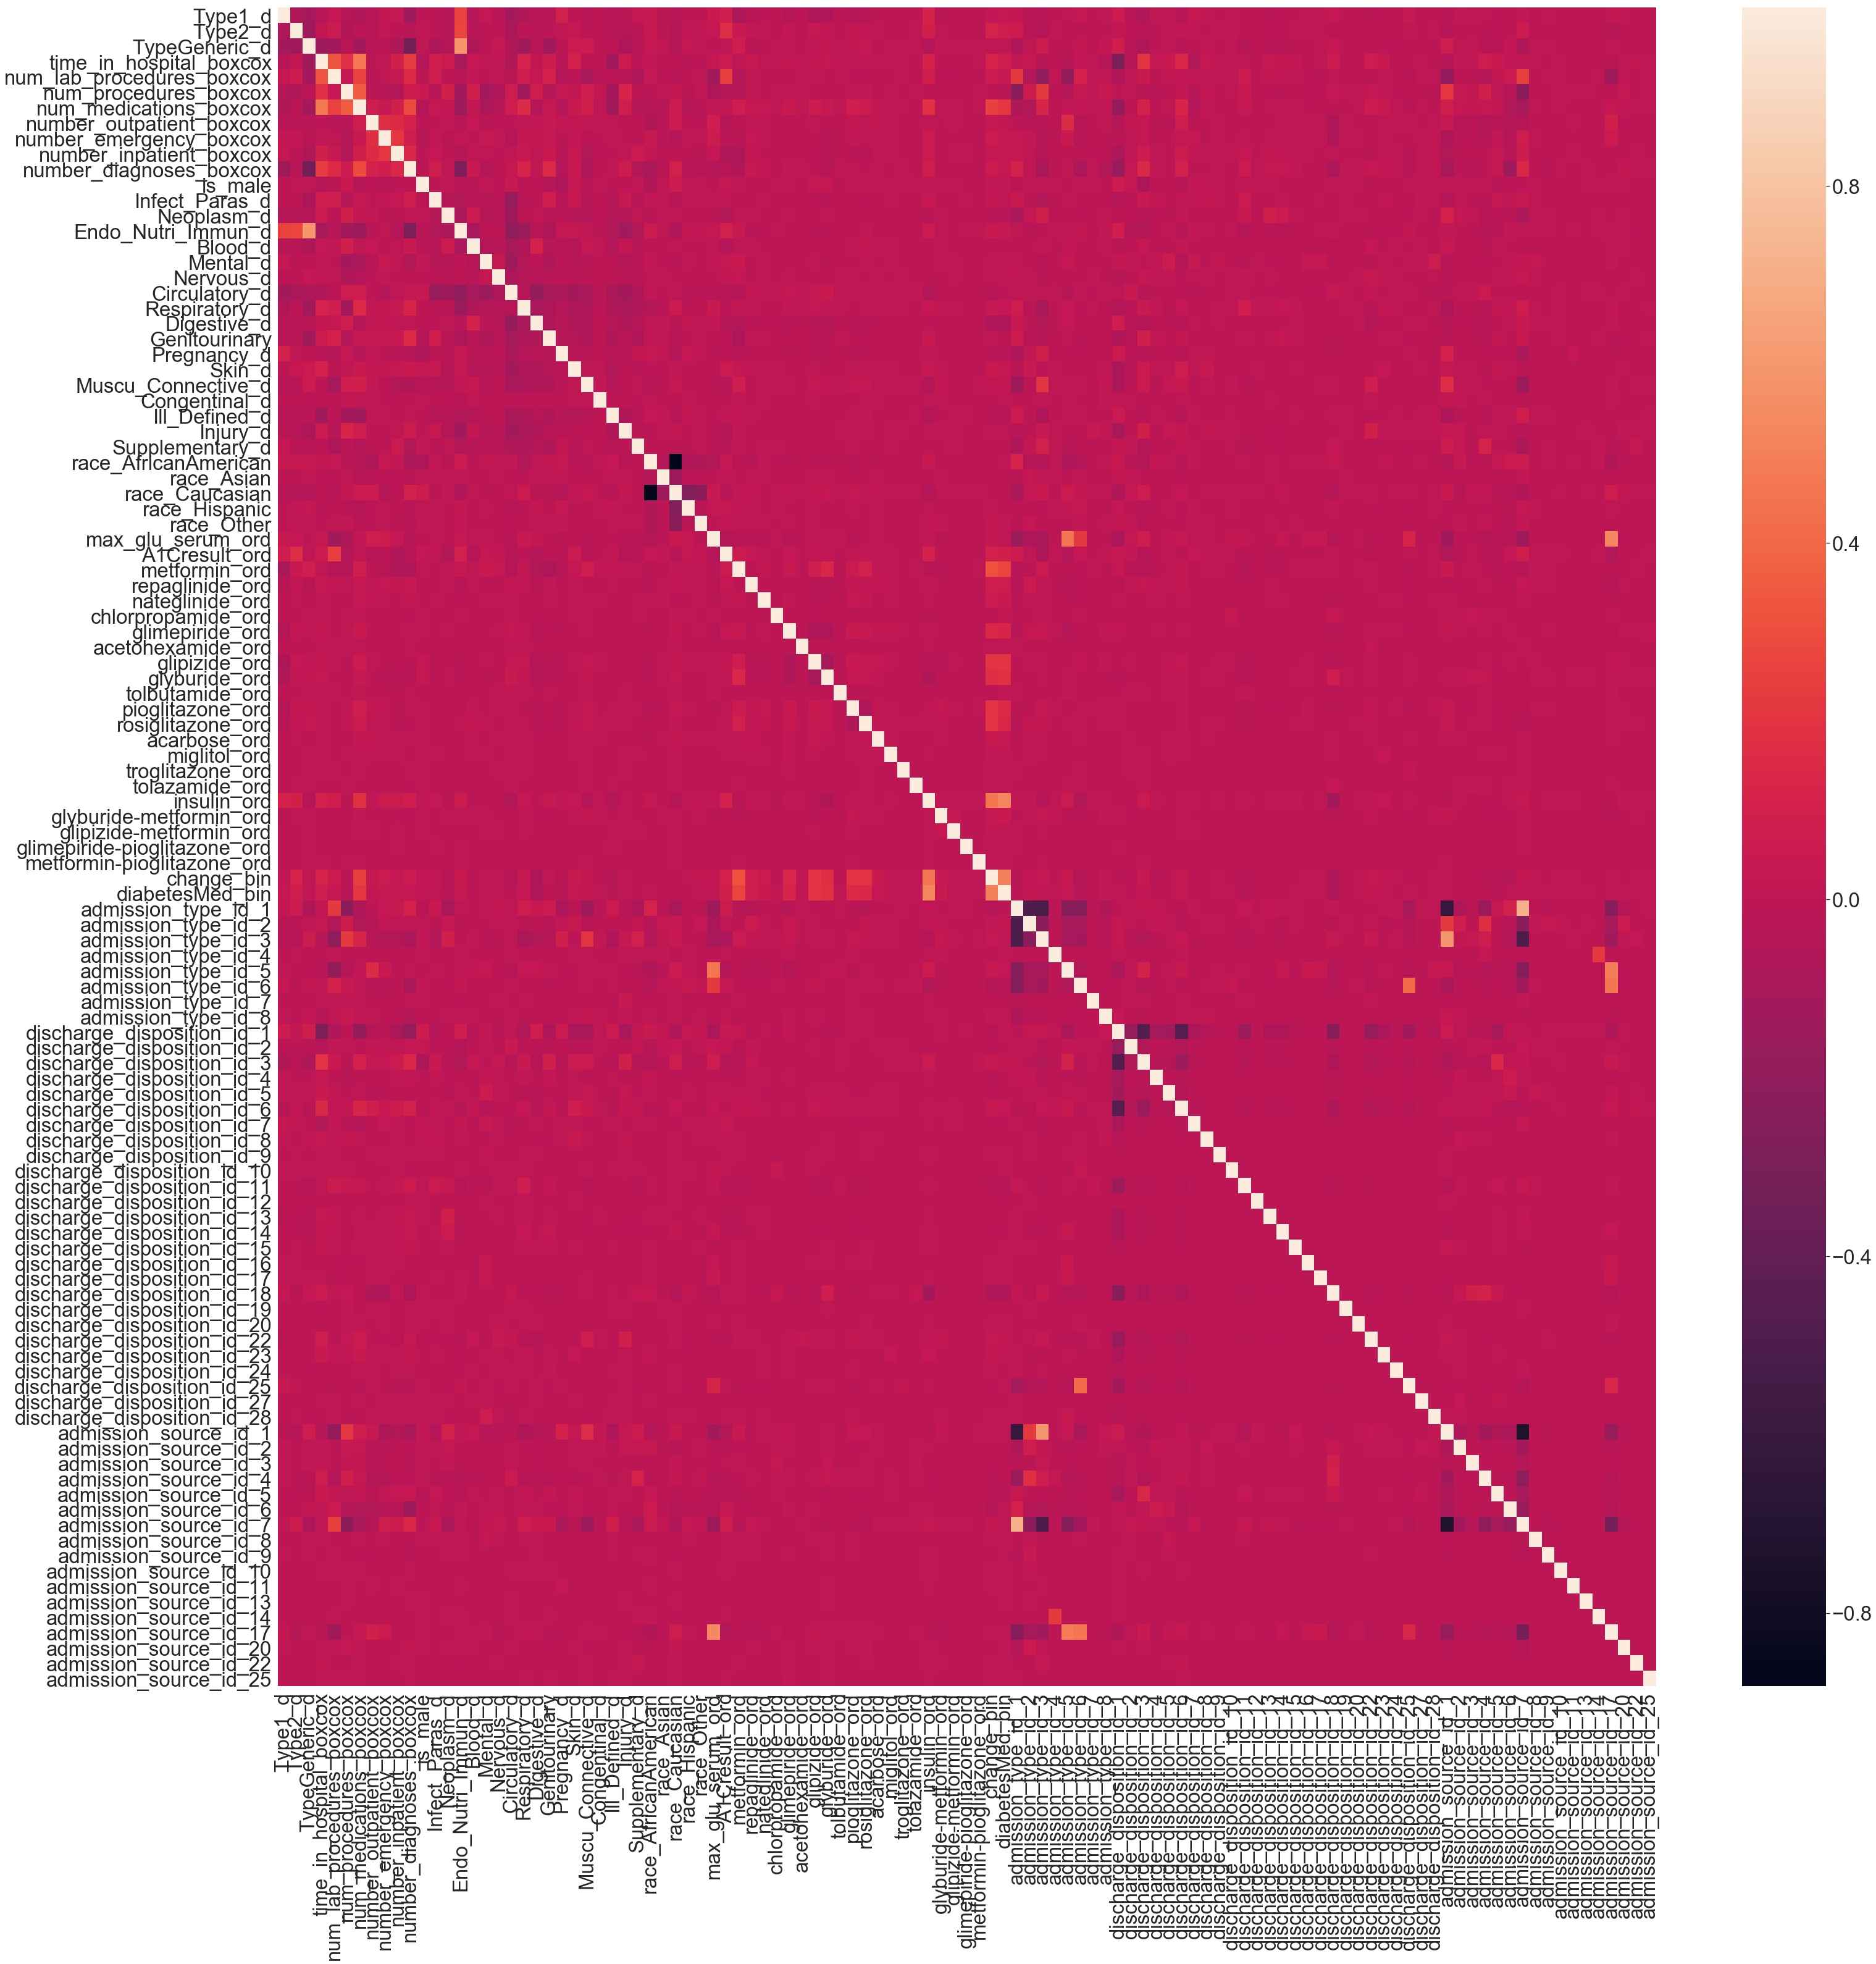

In [75]:
# feature correlation heatmap
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(1,1,1)
correlation = dataIn[input_features].corr()

sns.heatmap(correlation, ax=ax,
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)
plt.show()

In [99]:
#dropping a few features that are 0s
input_features = ['Type1_d','Type2_d','TypeGeneric_d','time_in_hospital_boxcox','num_lab_procedures_boxcox'
,'num_procedures_boxcox','num_medications_boxcox','number_outpatient_boxcox','number_emergency_boxcox'
,'number_inpatient_boxcox','number_diagnoses_boxcox','is_male','Infect_Paras_d','Neoplasm_d'
,'Endo_Nutri_Immun_d','Blood_d','Mental_d','Nervous_d','Circulatory_d','Respiratory_d','Digestive_d'
,'Genitourinary','Pregnancy_d','Skin_d','Muscu_Connective_d','Congentinal_d','Ill_Defined_d'
,'Injury_d','Supplementary_d','race_Asian','race_Caucasian'
,'race_Hispanic','race_Other','max_glu_serum_ord','A1Cresult_ord','metformin_ord','repaglinide_ord'
,'nateglinide_ord','chlorpropamide_ord','glimepiride_ord','acetohexamide_ord','glipizide_ord'
,'glyburide_ord','tolbutamide_ord','pioglitazone_ord','rosiglitazone_ord','acarbose_ord','miglitol_ord'
,'troglitazone_ord','tolazamide_ord','insulin_ord','glyburide-metformin_ord'
,'glipizide-metformin_ord','glimepiride-pioglitazone_ord'
,'metformin-pioglitazone_ord','age_ord','change_bin','diabetesMed_bin'
,'admission_type_id_2','admission_type_id_3','admission_type_id_4','admission_type_id_5'
,'admission_type_id_6','admission_type_id_7','admission_type_id_8'
,'discharge_disposition_id_2','discharge_disposition_id_3'
,'discharge_disposition_id_4','discharge_disposition_id_5'
,'discharge_disposition_id_6','discharge_disposition_id_7'
,'discharge_disposition_id_8','discharge_disposition_id_9'
,'discharge_disposition_id_10','discharge_disposition_id_11'
,'discharge_disposition_id_12','discharge_disposition_id_13'
,'discharge_disposition_id_14','discharge_disposition_id_15'
,'discharge_disposition_id_16','discharge_disposition_id_17'
,'discharge_disposition_id_18','discharge_disposition_id_19'
,'discharge_disposition_id_20','discharge_disposition_id_22'
,'discharge_disposition_id_23','discharge_disposition_id_24'
,'discharge_disposition_id_25','discharge_disposition_id_27'
,'discharge_disposition_id_28'
,'admission_source_id_2','admission_source_id_3','admission_source_id_4','admission_source_id_5'
,'admission_source_id_6','admission_source_id_7','admission_source_id_8','admission_source_id_9'
,'admission_source_id_10','admission_source_id_11','admission_source_id_13','admission_source_id_14'
,'admission_source_id_17','admission_source_id_20','admission_source_id_22','admission_source_id_25']

In [65]:
dataIn[input_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Type1_d,99021.0,0.061492,0.240232,0.0,0.000000,0.000000,0.000000,1.000000
Type2_d,99021.0,0.063471,0.243810,0.0,0.000000,0.000000,0.000000,1.000000
TypeGeneric_d,99021.0,0.252532,0.434467,0.0,0.000000,0.000000,1.000000,1.000000
time_in_hospital_boxcox,99021.0,1.389098,0.834402,0.0,0.726035,1.522041,2.022778,3.160347
num_lab_procedures_boxcox,99021.0,38.649983,17.826747,0.0,27.950907,39.704374,51.360052,117.487915
num_procedures_boxcox,99021.0,0.431468,0.425894,0.0,0.000000,0.566191,0.802625,1.143745
num_medications_boxcox,99021.0,4.909569,1.499132,0.0,3.826982,4.959005,5.884092,9.574113
number_outpatient_boxcox,99021.0,0.029991,0.067203,0.0,0.000000,0.000000,0.000000,0.182759
number_emergency_boxcox,99021.0,0.011901,0.033191,0.0,0.000000,0.000000,0.000000,0.104559
number_inpatient_boxcox,99021.0,0.134179,0.188693,0.0,0.000000,0.000000,0.363019,0.470644


In [62]:
pd.options.display.max_rows = 150
dataIn[input_features].head(2).T

,0,1
Type1_d,1,1
Type2_d,0,0
TypeGeneric_d,0,0
time_in_hospital_boxcox,0,1.18276
num_lab_procedures_boxcox,37.0018,53.1462
num_procedures_boxcox,0,0
num_medications_boxcox,0,5.53258
number_outpatient_boxcox,0,0
number_emergency_boxcox,0,0
number_inpatient_boxcox,0,0


In [100]:
#Review co-correlations using VIF
X = dataIn[input_features].values

X = X.astype(float)

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif)


[1.6280707360307132, 1.5850574953206986, 3.3008432247721835, 6.016601285743028, 8.247972536021344, 2.826830027274496, 20.015894001812562, 1.3325043311192917, 1.2525600973965563, 1.6973037435866272, 7.780783552115634, 1.893317614408429, 1.1634245505094916, 1.2170391951931914, 5.349002138015114, 1.156633176445985, 1.1740884558061813, 1.0867508640718926, 3.8409783410322795, 1.6909784151408565, 1.3879473498547703, 1.4535409317818986, 1.06783922087425, 1.2231420337657068, 1.2617076721844867, 1.0054177943455, 1.3171677868985818, 1.303901037468783, 1.1518539865098465, 1.041244043960995, 5.2852730176994465, 1.1141877157495406, 1.0849388935986917, 1.6605873559003026, 1.3489425996508104, 1.6153630855699528, 1.050224583757737, 1.020711539143305, 1.008862057917684, 1.1597854217495702, 1.0007020075529123, 1.405337382573801, 1.3889397509873302, 1.0018393792968348, 1.1915875019083224, 1.1619465777375977, 1.0086645346987178, 1.0026664994629453, 1.0011245588325133, 1.0032617453146893, 3.904163146588924

In [101]:
for f, v in zip(input_features, vif):
    print(f, ":", v)

Type1_d : 1.6280707360307132
Type2_d : 1.5850574953206986
TypeGeneric_d : 3.3008432247721835
time_in_hospital_boxcox : 6.016601285743028
num_lab_procedures_boxcox : 8.247972536021344
num_procedures_boxcox : 2.826830027274496
num_medications_boxcox : 20.015894001812562
number_outpatient_boxcox : 1.3325043311192917
number_emergency_boxcox : 1.2525600973965563
number_inpatient_boxcox : 1.6973037435866272
number_diagnoses_boxcox : 7.780783552115634
is_male : 1.893317614408429
Infect_Paras_d : 1.1634245505094916
Neoplasm_d : 1.2170391951931914
Endo_Nutri_Immun_d : 5.349002138015114
Blood_d : 1.156633176445985
Mental_d : 1.1740884558061813
Nervous_d : 1.0867508640718926
Circulatory_d : 3.8409783410322795
Respiratory_d : 1.6909784151408565
Digestive_d : 1.3879473498547703
Genitourinary : 1.4535409317818986
Pregnancy_d : 1.06783922087425
Skin_d : 1.2231420337657068
Muscu_Connective_d : 1.2617076721844867
Congentinal_d : 1.0054177943455
Ill_Defined_d : 1.3171677868985818
Injury_d : 1.3039010374

#### Takeaways/Questions to answer: 
There do not seem to be many variables that are unreasonably co-correlated with the remainder of the features.  The ones with the largest VIF are number of medications (~20) and age (~18).  We want to keep these features regardless as we feel they will be relevant indicators to readmittance likelihood.  The number of medications is likely highly correlated due to the number of ordinal medication features included.

As a result, we won't remove any features right out, but rather allow regularization to handle any irrelevant features.

### Prepare train and test data

#### Splitting

In [ ]:
# Drop the original columns that have been encoded and save as data_encoded
# Original columns are kept in dataIn
data_encoded = dataIn.drop(ohe_cols+ord_cols+bin_cols, axis=1) #Note: suggest using input_features from above as mask.

In [ ]:
y = data_encoded['readmitted_bin']

# normalized X for parametric models
all_cols = data_encoded.columns
X_norm = data_encoded[set(all_cols)-set(cont_cols)]
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=1)  

# unnormalized X for non-parametric models
X_unnorm = data_encoded[set(all_cols)-set(cont_cols_boxcox)]
X_unnorm_train, X_unnorm_test, y_unnorm_train, y_unnorm_test = train_test_split(
    X_unnorm, y, test_size=0.2, random_state=1)

#### Normalizing features

In [ ]:
# Use MinMax scaler to normalize continuous and ordinal features
scaler = MinMaxScaler()
X_norm_train[cont_cols_boxcox + ord_cols_new] = scaler.fit_transform(
    X_norm_train[cont_cols_boxcox + ord_cols_new])

# Apply the same scaler on test data
X_norm_test[cont_cols_boxcox + ord_cols_new] = scaler.transform(X_norm_test[cont_cols_boxcox + ord_cols_new])